In [1]:
setwd("C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data")
insurance = read.csv("insurance.csv")

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


[1] 0.1092719

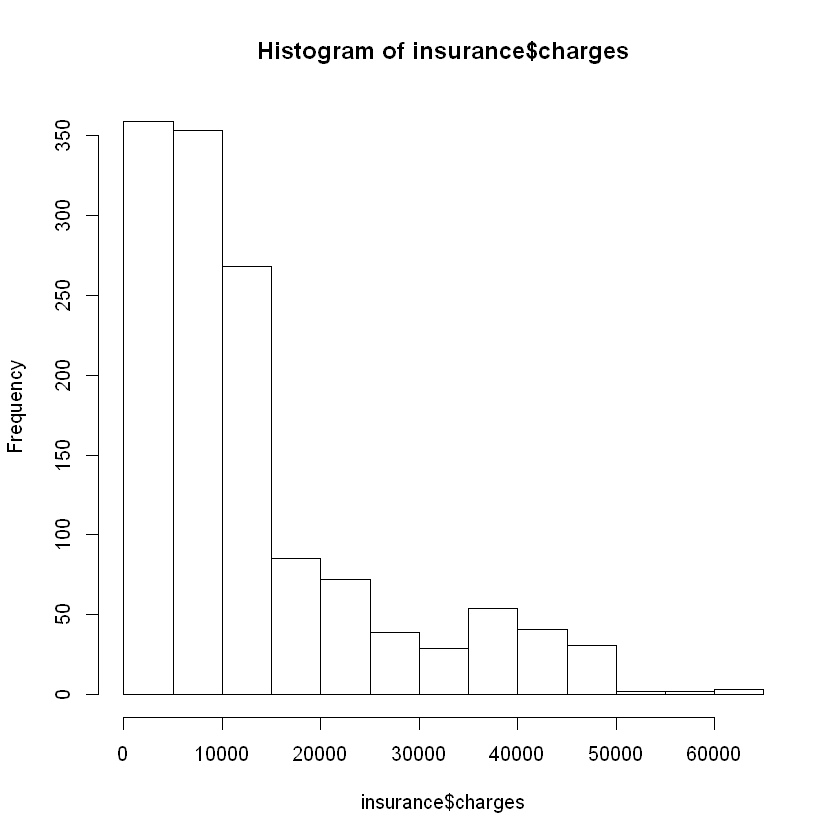

In [2]:
head(insurance)
## check for normal distribution( target variable)
hist(insurance$charges)
### Check for multicollinearity
cor( insurance$age, insurance$bmi)

In [3]:
ids = sample(nrow(insurance), nrow(insurance)*0.8)
train = insurance[ids, ]
test = insurance[ -ids, ]

In [5]:
library(ISLR)
library(ggplot2)
library(rpart)				        # Popular decision tree algorithm
library(rattle)					# Fancy tree plot
library(rpart.plot)				# Enhanced tree plots
library(RColorBrewer)				# Color selection for fancy tree plot
library(party)					# Alternative decision tree algorithm
library(partykit)				# Convert rpart object to BinaryTree
library(caret)


Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.4.4"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.4"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.4.4"
Attaching package: 'partykit'

The following objects are masked from 'package:party':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal

Loading required package: lattice


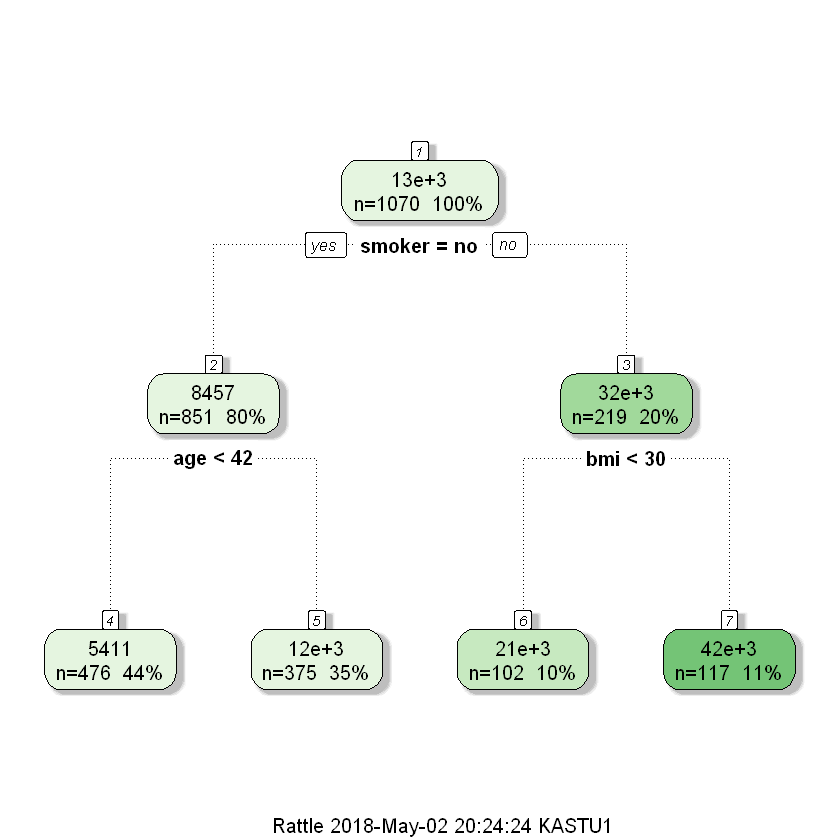

In [6]:
tree1 = rpart( charges ~ . , data=train,  method = "anova")
fancyRpartPlot(tree1)

In [12]:
test$pred = predict( tree1, newdata = test)

In [8]:
test$err_sum  = (test$charges - test$pred) ** 2

In [9]:
sqrt(mean(test$err_sum))

[1] 5237.659